# Rate distortion for Bernoulli with Hamming distortion 

This notebook creates a few figures used in preparation for the discussions on rate distortion

First version: 11/17/2025

This version: 11/17/2025

https://northeastern-datalab.github.io/cs7840/fa25/calendar.html

## Rate distortion for the Bernoulli p with Hamming distance

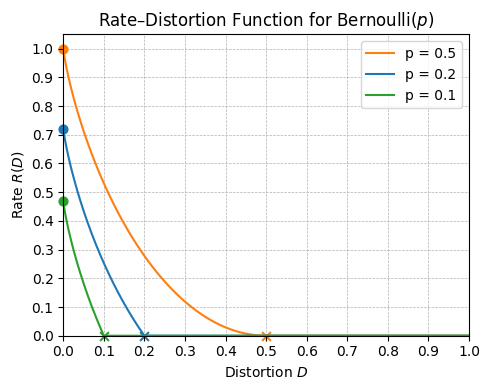

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# ---------- Helper: binary entropy ----------
def H_binary(x):
    """
    Binary entropy function H(x) in bits.
    Defined for x in [0,1].
    Uses clipping to avoid log(0) (np.clip(x, a, b) replaces x < a by a) / not really needed
    """
    # x = np.clip(x, 1e-12, 1)
    return -(x * np.log2(x) + (1 - x) * np.log2(1 - x))


# ---------- Rate–distortion function R(D) for Bernoulli(p) ----------
def R_of_D(D, p):
    """
    R(D) = H(p) - H(D) for 0 < D < p, and 0 otherwise.
    D can be a numpy array.
    """
    R = np.zeros_like(D, dtype=float)
    mask = (D > 0) & (D < p)
    R[mask] = H_binary(p) - H_binary(D[mask])
    return R


# ---------- Parameters ----------
p_values = [0.5, 0.2, 0.1]
D_min = 1e-3     # start slightly above 0 to avoid vertical segment
D_max = 1.0
num_points = 1000

D = np.linspace(D_min, D_max, num_points)

# ---------- Plot ----------
plt.figure(figsize=(5, 4))

colors = ['tab:orange', 'tab:blue', 'tab:green']

for p, color in zip(p_values, colors):
    R = R_of_D(D, p)
    plt.plot(D, R, label=f"p = {p}", color=color)

    # Mark the *starting* point at D = 0, R = H(p)
    R_start = H_binary(p)  # since H(0) = 0
    plt.scatter([0], [R_start], color=color, s=40, clip_on=False)   # clip_on draws the point on top of axes

    # Mark the endpoint where R(D) becomes 0: D = p
    plt.scatter([p], [0], color=color, s=40, marker='x', clip_on=False)

plt.xlabel("Distortion $D$")
plt.ylabel("Rate $R(D)$")
plt.title("Rate–Distortion Function for Bernoulli$(p)$")
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.01, 0.1))   # ← nice evenly spaced ticks
plt.ylim(0, 1.05)  # a bit of headroom above 1
plt.yticks(np.arange(0, 1.01, 0.1))   # ← nice evenly spaced ticks
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()